# Data Handling
You'll find here:

-Data loading

-Data cleaning

-SQL request

In [4]:
# BASIC IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nbresult import ChallengeResult

In [5]:
# DOWNLOAD FROM INTERNET

!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/tv_movies_popularity.csv \
    --output tv_movies_popularity.csv
!mv tv_movies_popularity.csv raw_data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1978k  100 1978k    0     0  1563k      0  0:00:01  0:00:01 --:--:-- 1563k


In [6]:
# READ CSV
df = pd.read_csv('raw_data/tv_movies_popularity.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   original_title             6864 non-null   object 
 1   title                      6863 non-null   object 
 2   popularity                 6864 non-null   float64
 3   release_date               6864 non-null   object 
 4   duration_min               6864 non-null   float64
 5   description                6864 non-null   object 
 6   budget                     6864 non-null   int64  
 7   revenue                    2778 non-null   float64
 8   original_language          6864 non-null   object 
 9   status                     6864 non-null   object 
 10  number_of_awards_won       6864 non-null   int64  
 11  number_of_nominations      6864 non-null   int64  
 12  has_collection             6864 non-null   int64  
 13  all_genres                 6864 non-null   objec

In [8]:
# DROP COLUMNS OR ROWS. In this case column revenue has 40% of NaNs
df.drop(columns=['revenue'], inplace=True) # labels, axis=0 for rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   original_title             6864 non-null   object 
 1   title                      6863 non-null   object 
 2   popularity                 6864 non-null   float64
 3   release_date               6864 non-null   object 
 4   duration_min               6864 non-null   float64
 5   description                6864 non-null   object 
 6   budget                     6864 non-null   int64  
 7   original_language          6864 non-null   object 
 8   status                     6864 non-null   object 
 9   number_of_awards_won       6864 non-null   int64  
 10  number_of_nominations      6864 non-null   int64  
 11  has_collection             6864 non-null   int64  
 12  all_genres                 6864 non-null   object 
 13  top_countries              6864 non-null   objec

In [9]:
# COUNT AND REMOVE DUPLICATES
duplicate_count = len(df)
df = df.drop_duplicates()
duplicate_count -= len(df) 
duplicate_count

400

In [10]:
# CHECK AND ELIMINATE NANS
print(df.isna().sum())
df.dropna(inplace=True, how='any') # 'any' means that a row is eliminated if at least one value es NaN. 'all' elimination 
                                   # take place if all the row values are NaN
print(df.isna().sum()) 

original_title               0
title                        1
popularity                   0
release_date                 0
duration_min                 0
description                  0
budget                       0
original_language            0
status                       0
number_of_awards_won         0
number_of_nominations        0
has_collection               0
all_genres                   0
top_countries                0
number_of_top_productions    0
available_in_english         0
dtype: int64
original_title               0
title                        0
popularity                   0
release_date                 0
duration_min                 0
description                  0
budget                       0
original_language            0
status                       0
number_of_awards_won         0
number_of_nominations        0
has_collection               0
all_genres                   0
top_countries                0
number_of_top_productions    0
available_in_english      

In [11]:
df.shape

(6463, 16)

In [12]:
# CHECK AND ELIMINATE INFS
print(df.shape)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(how='any')
print(df.shape)

(6463, 16)
(6463, 16)


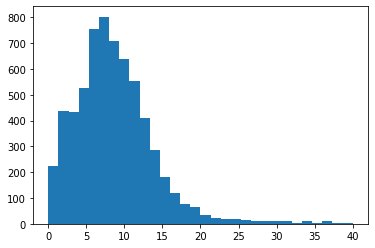

In [13]:
# CHOOSE METRIC COMPATIBLE WITH THE Y VALUES
# check for ditribution of y values:
df['popularity'].describe()
plt.hist(df.popularity, bins = 30, range = (0,40));

The metric to use should be
-better when greater (i.e. metric_good_model > metric_bad_model)
-penalize more an error between 10 and 20 compared with an error between 110 and 120
Said otherwise, what matter should be the relative error ratio, more than the absolute error difference
CHECK LECTURES

In [14]:
# SELECT FEATURES AND TARGET
# THE FINAL PIPELINE (PREPROCESSING AND MODEL) WILL WORK ON THIS X WITHOUT FURTHER PROCESSING 
X = df.drop(columns=['popularity'])
y = df['popularity']
y

0        6.575393
1        8.248895
2       64.299990
3        3.174936
4        7.286477
          ...    
6459     9.970359
6460     6.046516
6461     9.596883
6462    20.359336
6463    11.305910
Name: popularity, Length: 6463, dtype: float64

In [15]:
# PRINT UNIQUE ELEMENTS FOR EACH COLUMN
for feature in X.columns:
    print(feature)
    print(X[feature].nunique())
    print(X[feature].unique())
    print("---------------------")

original_title
6350
['Hot Tub Time Machine 2' 'The Princess Diaries 2: Royal Engagement'
 'Whiplash' ... 'The Verdict' 'It Follows'
 'Vivre sa vie: film en douze tableaux']
---------------------
title
6337
['Hot Tub Time Machine 2' 'The Princess Diaries 2: Royal Engagement'
 'Whiplash' ... 'The Verdict' 'It Follows' 'Vivre Sa Vie']
---------------------
release_date
4320
['2015-02-20' '2004-08-06' '2014-10-10' ... '2006-01-30' '2015-06-23'
 '1962-09-20']
---------------------
duration_min
152
[ 93. 113. 105. 122.  92. 100.  91. 119.  98. 118. 145.  97.  85. 111.
  96.  87. 130.  95. 116. 110.  84.  89. 112. 117. 106. 125.  94. 127.
 123. 126. 108.  88. 167. 102. 160. 107. 144. 124. 115. 133. 129. 104.
 103. 157. 109. 135. 147. 120. 121. 177. 189. 178.  86.  90.  79. 101.
  72.  99. 141. 136. 143. 132. 139. 114. 140.  83. 148. 137. 168. 156.
 154.  77.  76. 163. 155. 150. 149. 170.  80. 128. 131. 220. 181. 179.
  81.  82. 161. 134. 193. 158. 188. 212. 142. 146. 151. 171. 165. 162.
 185.

We will simply scale the numerical features and one-hot-encode the categorical ones remaining

📝 **Prepare 2 `list`s of features names as `str`**:
- `numerical` which contains **only** numerical features
- `categorical` which contains **only** categorical features (exept text and dates above)

In [20]:

# Columns to exclude in exercise:
text = ['description', 'original_title', 'title']
dates = ['release_date'] 

inputs_num = X.select_dtypes(include=[float,int]).columns
inputs_num

Index(['duration_min', 'budget', 'number_of_awards_won',
       'number_of_nominations', 'has_collection', 'number_of_top_productions'],
      dtype='object')

In [21]:
inputs_cat = X.select_dtypes(include=['object', 'bool']).drop(columns=text+dates).columns
inputs_cat

Index(['original_language', 'status', 'all_genres', 'top_countries',
       'available_in_english'],
      dtype='object')

#### Preprocessing pipeline

**📝 Create a basic preprocessing pipeline for the 2 types of features above:**
- It should scale the `numerical` features
- one-hot-encode the `categorical` and `boolean` features
- drop the others
- Store your pipeline in a `basic_preprocessing` variable

In [22]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [30]:
X[inputs_num]

,duration_min,budget,number_of_awards_won,number_of_nominations,has_collection,number_of_top_productions
0,93.0,14000000,0,2,1,3
1,113.0,40000000,1,2,1,1
2,105.0,3300000,97,145,0,0
3,122.0,1200000,23,18,0,0
4,92.0,14000000,0,6,0,0
...,...,...,...,...,...,...
6459,118.0,42000000,0,2,0,1
6460,95.0,19000000,0,0,1,1
6461,129.0,16000000,3,14,0,1
6462,100.0,2000000,25,43,0,0


In [43]:
# TEST NUMERICAL PREPROCESSING
preprocpipe_num = RobustScaler()
print(preprocpipe_num.fit_transform(X[inputs_num]))
# TEST CATEGORICAL PREPROCESSING
preprocpipe_cat = OneHotEncoder(drop='if_binary', sparse=False) # Here it is better to use sparse=True
print(preprocpipe_cat.fit_transform(X[inputs_cat]))


[[-0.5         0.09368369 -0.33333333 -0.25        1.          2.        ]
 [ 0.33333333  0.905609   -0.16666667 -0.25        1.          0.        ]
 [ 0.         -0.2404548  15.83333333 11.66666667  0.         -1.        ]
 ...
 [ 1.          0.15613948  0.16666667  0.75        0.          0.        ]
 [-0.20833333 -0.28105107  3.83333333  3.16666667  0.         -1.        ]
 [-0.83333333 -0.34150828  0.16666667 -0.33333333  0.         -1.        ]]
[[0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
X[inputs_cat]

,original_language,status,all_genres,top_countries,available_in_english
0,en,Released,Comedy,United States of America,True
1,en,Released,"Comedy, Drama, Family, Romance",United States of America,True
2,en,Released,Drama,United States of America,True
3,hi,Released,"Drama, Thriller",India,True
4,en,Released,"Horror, Thriller","Canada, United States of America",True
...,...,...,...,...,...
6459,en,Released,Thriller,"France, United States of America",True
6460,en,Released,"Action, Adventure, Comedy, Thriller",United States of America,True
6461,en,Released,Drama,United States of America,True
6462,en,Released,"Horror, Thriller",United States of America,True


In [42]:
preprocpipe_cat = OneHotEncoder(drop='if_binary', sparse=False)
preprocpipe_cat.fit_transform(X[inputs_cat])

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
np.array(preprocpipe_cat.fit_transform(X[inputs_cat]))

array(<6463x1111 sparse matrix of type '<class 'numpy.float64'>'
	with 31659 stored elements in Compressed Sparse Row format>, dtype=object)